[FUENTE DE INFORMACION: - url: (https://archive.ics.uci.edu/ml/datasets/car+evaluation)](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)
1. [Estudiando el conjunto de Datos](#estudiando-los-datos)
    1. [Graficando las clases](#grafico-clases)
1. [Aplicando SMOTE](#aplicando-smote)
    1. [Aplicando SMOTE con las proportions modificadas](#aplicando-smote-proportion)
        1. [Matriz de Confusion](#smote-matriz_confusion)
    1. [SMOTE IPF con proportion modificado](#smote-ipf-proportion0.7)
        1. [Matriz de Confusion](#smote_ipf-matriz_confusion)
    1. [SMOTE ENN con proportion modificado](#smote-enn-proportion0.7)
        1. [Matriz de Confusion](#smote_enn-matriz_confusion)
    1. [SMOTE TOMEKLinks con proportion modificado](#smote-tomekLinks-proportion0.7)
        1. [Matriz de Confusion](#smote_tklinks-matriz_confusion)
    1. [Analisis SMOTE: Mejor estimador](#analisis-smote-mejor_estimador)

<a id='estudiando-los-datos'></a>
## Estudiando el conjunto de Datos
[Inicio ▲](#Indice)

In [1]:
import pandas as pd
import category_encoders as ce 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("car_evaluation.csv",header=None)
data.head()
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names
# de la columna de clases se opto por reducir a valores de aceptable e inaceptable, y transformarlos a 0 y 1 respectivamente
data=data.replace({"unacc":0,"acc":1, "good":1, "vgood":1})
def show(data):
  for i in data.columns[1:]:
    print("Atributo: {} con Niveles : {} ".format(i,data[i].unique()))

show(data)
data.dtypes
# Convertimos las variables Categoricas a Ordinales 
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety'])
data = encoder.fit_transform(data)
data.head()
for col in col_names:
    print(data[col].value_counts())  
data.isnull().sum()
data['class'].value_counts()
X = data.drop(['class'], axis=1)

y = data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

Atributo: maint con Niveles : ['vhigh' 'high' 'med' 'low'] 
Atributo: doors con Niveles : ['2' '3' '4' '5more'] 
Atributo: persons con Niveles : ['2' '4' 'more'] 
Atributo: lug_boot con Niveles : ['small' 'med' 'big'] 
Atributo: safety con Niveles : ['low' 'med' 'high'] 
Atributo: class con Niveles : [0 1] 
1    432
2    432
3    432
4    432
Name: buying, dtype: int64
1    432
2    432
3    432
4    432
Name: maint, dtype: int64
1    432
2    432
3    432
4    432
Name: doors, dtype: int64
1    576
2    576
3    576
Name: persons, dtype: int64
1    576
2    576
3    576
Name: lug_boot, dtype: int64
1    576
2    576
3    576
Name: safety, dtype: int64
0    1210
1     518
Name: class, dtype: int64
(1157, 6)
(571, 6)


In [3]:
print("inaceptable: {}".format(len(y[y==0])))
print("aceptable: {}".format(len(y[y==1])))

inaceptable: 1210
aceptable: 518


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int32
 1   maint     1728 non-null   int32
 2   doors     1728 non-null   int32
 3   persons   1728 non-null   int32
 4   lug_boot  1728 non-null   int32
 5   safety    1728 non-null   int32
 6   class     1728 non-null   int64
dtypes: int32(6), int64(1)
memory usage: 54.1 KB


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
clasifier = RandomForestClassifier(random_state=42, n_estimators=100)
# clasifier= GaussianNB()
# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
clasifier.score(X_test,y_test)

0.9877408056042032

In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

def calculoF1_score(cm):
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    return (2*TP)/((2*TP)+FP+FN)

print('Calculo del F1 Score es: ', calculoF1_score(cm))

Confusion matrix

 [[394   3]
 [  4 170]]
Calculo del F1 Score es:  0.9798270893371758


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.98      0.98      0.98       174

    accuracy                           0.99       571
   macro avg       0.99      0.98      0.99       571
weighted avg       0.99      0.99      0.99       571



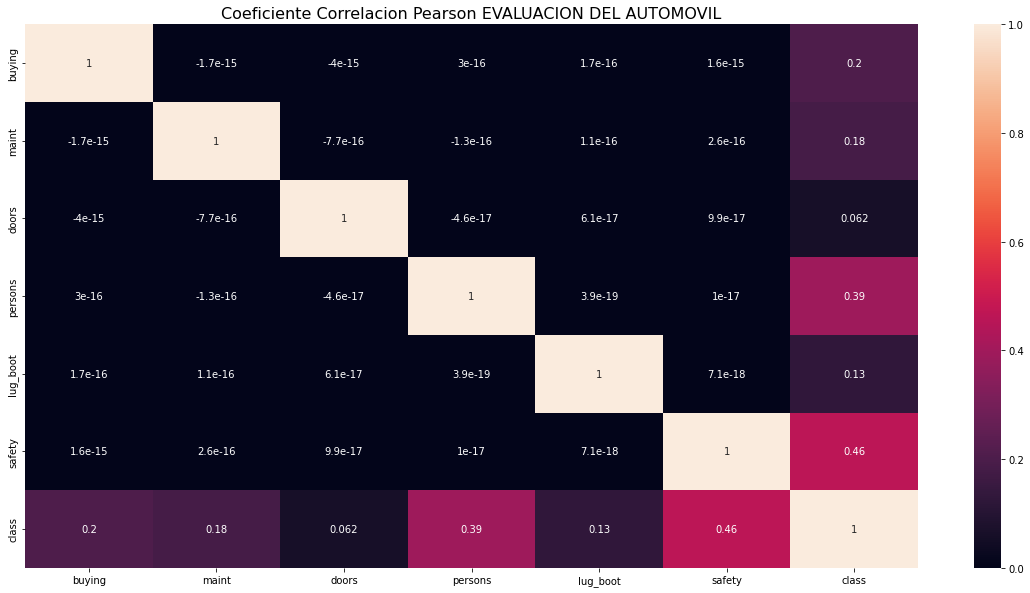

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# corr_df = data.corr()
corr_df = data.corr(method='pearson')

plt.figure(figsize=(20, 10))
sns.heatmap(corr_df, annot=True)
plt.title('Coeficiente Correlacion Pearson EVALUACION DEL AUTOMOVIL', fontsize=16)
plt.show()

<a id='grafico-clases'></a>
## Grafico de Clases
[Inicio ▲](#Indice)

Text(0.5, 1.0, 'Distribucion de clases sin aplicar SMOTE')

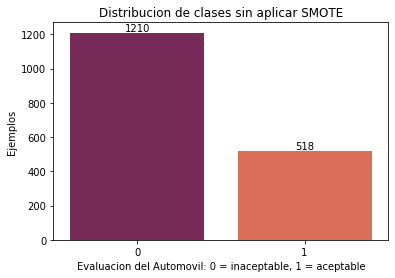

In [9]:
ax =  sns.countplot(x='class', data=data, palette='rocket')

abs_values = data['class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil: 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases sin aplicar SMOTE')

<a id='aplicando-smote'></a>
## Aplicando SMOTE
[Inicio ▲](#Indice)

In [10]:
import smote_variants as sv
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


In [41]:
# oversampler= sv.SMOTE()
# oversampler= sv.SMOTE_IPF()
# oversampler= sv.SMOTE_ENN()
oversampler= sv.SMOTE_TomekLinks()
classifier= GaussianNB()
# classifier= RandomForestClassifier(random_state=42, n_estimators=100)
model= Pipeline([
                ('scale', StandardScaler()),
                ('clf', sv.OversamplingClassifier(oversampler, classifier))
            ])
# model.fit(X_train, y_train)
param_grid= {'clf__oversampler':[sv.distance_SMOTE(proportion=0.2),
                                 sv.distance_SMOTE(proportion=0.3),
                                 sv.distance_SMOTE(proportion=0.4),
                                 sv.distance_SMOTE(proportion=0.5),
                                 sv.distance_SMOTE(proportion=0.6),
                                 sv.distance_SMOTE(proportion=0.7),
                                 sv.distance_SMOTE(proportion=0.8),
                                 sv.distance_SMOTE(proportion=0.9),
                                 sv.distance_SMOTE(proportion=1.0)]}
param_grid['clf__oversampler']

2022-06-25 21:27:46,219:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:46,220:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-06-25 21:27:46,226:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


In [42]:
scoring = {"recall": "recall", "precision": "precision", "f1" : "f1"}
grid= GridSearchCV(model, param_grid= param_grid, cv= 3, n_jobs= 1, verbose= 2, scoring= scoring, refit='recall' ) #probar con lista ['f1','recall','precision']
grid.fit(X_train, y_train)

2022-06-25 21:27:51,134:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,152:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,171:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,188:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,200:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,211:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,223:INFO:dista

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 

2022-06-25 21:27:51,312:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,331:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,347:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,364:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,381:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,398:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,417:INFO:dista

[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf_

2022-06-25 21:27:51,522:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,542:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,560:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:27:51,579:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        OversamplingClassifier(classifier=GaussianNB(),
                                                               oversampler=<smote_variants._smote_variants.SMOTE_TomekLinks object at 0x000001A322F7CAF0>))]),
             n_jobs=1,
             param_grid={'clf__oversampler': [<smote_variants._smote_variants.distance_SMOTE object at 0x000001A322085690>,
                                              <smote_variants._s...
                                              <smote_variants._smote_variants.distance_SMOTE object at 0x000001A322F7D150>]},
             refit='recall',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=2)

<a id='analisis-smote-mejor_estimador'></a>
## Analisis del Mejor Estimador
1. [Inicio ▲](#Indice)
1. [Aplicando Smote ▲](#aplicando-smote)

In [43]:
datos = {'proportions' : ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9','1.0'],
         'Recall' : grid.cv_results_['mean_test_recall'],
         'Precision' : grid.cv_results_['mean_test_precision'],
         'F1' : grid.cv_results_['mean_test_f1']}

df = pd.DataFrame(datos)

print(grid.get_params)
print(df)

y_pred = grid.best_estimator_.predict(X_test)

print(y_pred)


cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

def calculoF1_score(cm):
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    return (2*TP)/((2*TP)+FP+FN)

print('Calculo del F1 Score es: ', calculoF1_score(cm))
print('PUNTAJE MEJOR ESTIMADOR: ' , grid.best_estimator_.score(X_test, y_test))

<bound method BaseEstimator.get_params of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        OversamplingClassifier(classifier=GaussianNB(),
                                                               oversampler=<smote_variants._smote_variants.SMOTE_TomekLinks object at 0x000001A322F7CAF0>))]),
             n_jobs=1,
             param_grid={'clf__oversampler': [<smote_variants._smote_variants.distance_SMOTE object at 0x000001A322085690>,
                                              <smote_variants._s...
                                              <smote_variants._smote_variants.distance_SMOTE object at 0x000001A322F7D150>]},
             refit='recall',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=2)>
  proportions    Recall  Precision        F1
0         0.2  0.859821   0.878028  0.867947
1         0

<a id='aplicando-smote-proportion'></a>
## Aplicando SMOTE con las proportions modificadas
[Inicio ▲](#Indice)

In [14]:
import numpy as np

In [15]:
y_sinSmote = y.to_numpy()
print('majority class: %d' % np.sum(y_sinSmote == 0))
print('minority class: %d' % np.sum(y_sinSmote == 1))

majority class: 1210
minority class: 518


In [16]:
oversampler= sv.SMOTE(proportion=0.7)
X_samp, y_samp= oversampler.sample(X.to_numpy(), y.to_numpy())
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

2022-06-25 21:16:20,418:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


majority class: 1210
minority class: 1002


In [17]:
dfSmote = pd.DataFrame(X_samp)
dfSmote = dfSmote.assign(col_class = y_samp)
dfSmote

,0,1,2,3,4,5,col_class
0,1.000000,1.0,1.000000,1.0,1.0,1.000000,0
1,1.000000,1.0,1.000000,1.0,1.0,2.000000,0
2,1.000000,1.0,1.000000,1.0,1.0,3.000000,0
3,1.000000,1.0,1.000000,1.0,2.0,1.000000,0
4,1.000000,1.0,1.000000,1.0,2.0,2.000000,0
...,...,...,...,...,...,...,...
2207,3.000000,3.0,1.218778,3.0,3.0,3.000000,1
2208,2.064279,3.0,2.000000,2.0,1.0,3.000000,1
2209,3.000000,4.0,4.000000,2.0,3.0,2.752826,1
2210,3.061667,3.0,3.000000,3.0,3.0,3.000000,1


In [18]:
dfSmote

,0,1,2,3,4,5,col_class
0,1.000000,1.0,1.000000,1.0,1.0,1.000000,0
1,1.000000,1.0,1.000000,1.0,1.0,2.000000,0
2,1.000000,1.0,1.000000,1.0,1.0,3.000000,0
3,1.000000,1.0,1.000000,1.0,2.0,1.000000,0
4,1.000000,1.0,1.000000,1.0,2.0,2.000000,0
...,...,...,...,...,...,...,...
2207,3.000000,3.0,1.218778,3.0,3.0,3.000000,1
2208,2.064279,3.0,2.000000,2.0,1.0,3.000000,1
2209,3.000000,4.0,4.000000,2.0,3.0,2.752826,1
2210,3.061667,3.0,3.000000,3.0,3.0,3.000000,1


Text(0.5, 1.0, 'Distribucion de clases aplicando SMOTE \n con un proportion = 0.7')

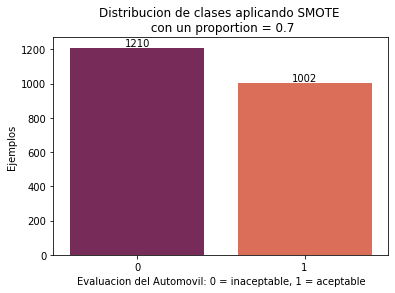

In [19]:
ax =  sns.countplot(x='col_class', data=dfSmote, palette='rocket')

abs_values = dfSmote['col_class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil: 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases aplicando SMOTE \n con un proportion = 0.7')

<a id='smote-matriz_confusion'></a>
## SMOTE: Matriz de Confusion
[Inicio ▲](#Indice)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[364  39]
 [  4 323]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       403
           1       0.89      0.99      0.94       327

    accuracy                           0.94       730
   macro avg       0.94      0.95      0.94       730
weighted avg       0.95      0.94      0.94       730



<a id='smote-ipf-proportion0.7'></a>
## SMOTE IPF con proportion modificado
[Inicio ▲](#Indice)

In [21]:
oversampler_ipf= sv.SMOTE_IPF(proportion=0.7)
X_ipf, y_ipf= oversampler_ipf.sample(X.to_numpy(), y.to_numpy())

2022-06-25 21:16:21,091:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 0.7, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-06-25 21:16:21,093:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-06-25 21:16:21,129:INFO:SMOTE_IPF: Removing 0 elements
2022-06-25 21:16:21,157:INFO:SMOTE_IPF: Removing 0 elements
2022-06-25 21:16:21,181:INFO:SMOTE_IPF: Removing 0 elements


In [22]:
print('majority class: %d' % np.sum(y_ipf == 0))
print('minority class: %d' % np.sum(y_ipf == 1))

majority class: 1210
minority class: 1002


Text(0.5, 1.0, 'Distribucion de clases aplicando SMOTE IPF \n con un proportion = 0.7')

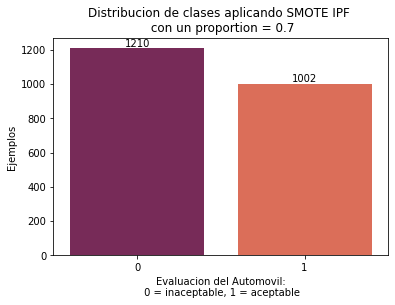

In [23]:
dfSmoteIPF = pd.DataFrame(X_ipf)
dfSmoteIPF = dfSmoteIPF.assign(col_class = y_ipf)
dfSmoteIPF
ax =  sns.countplot(x='col_class', data=dfSmoteIPF, palette='rocket')

abs_values = dfSmoteIPF['col_class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil:\n 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases aplicando SMOTE IPF \n con un proportion = 0.7')

<a id='smote_ipf-matriz_confusion'></a>
## SMOTE-IPF: Matriz de Confusion
[Inicio ▲](#Indice)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_ipf, y_ipf, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[366  37]
 [  3 324]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       403
           1       0.90      0.99      0.94       327

    accuracy                           0.95       730
   macro avg       0.94      0.95      0.95       730
weighted avg       0.95      0.95      0.95       730



<a id='smote_enn-proportion0.7'></a>
## SMOTE ENN con proportion modificado
[Inicio ▲](#Indice)

In [25]:
oversampler_enn= sv.SMOTE_ENN(proportion=0.5)
X_enn, y_enn= oversampler_enn.sample(X.to_numpy(), y.to_numpy())
print('majority class: %d' % np.sum(y_enn == 0))
print('minority class: %d' % np.sum(y_enn == 1))

2022-06-25 21:16:21,767:INFO:SMOTE_ENN: Running sampling via ('SMOTE_ENN', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:16:21,768:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-06-25 21:16:21,778:INFO:EditedNearestNeighbors: Running noise removal via EditedNearestNeighbors


majority class: 1208
minority class: 815


Text(0.5, 1.0, 'Distribucion de clases aplicando SMOTE ENN \n con un proportion = 0.5')

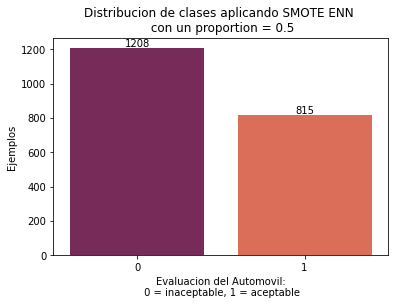

In [26]:
dfSmoteENN = pd.DataFrame(X_enn)
dfSmoteENN = dfSmoteENN.assign(col_class = y_enn)
dfSmoteENN
ax =  sns.countplot(x='col_class', data=dfSmoteENN, palette='rocket')

abs_values = dfSmoteENN['col_class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil:\n 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases aplicando SMOTE ENN \n con un proportion = 0.5')

<a id='smote_enn-matriz_confusion'></a>
## SMOTE-ENN: Matriz de Confusion
[Inicio ▲](#Indice)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_enn, y_enn, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[371  34]
 [  9 254]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       405
           1       0.88      0.97      0.92       263

    accuracy                           0.94       668
   macro avg       0.93      0.94      0.93       668
weighted avg       0.94      0.94      0.94       668



<a id='smote-tomekLinks-proportion0.7'></a>
## SMOTE TOMEKLinks con proportion modificado
[Inicio ▲](#Indice)

In [28]:
oversampler_klinks= sv.SMOTE_TomekLinks(proportion=0.2)
X_tklinks, y_tklinks= oversampler_klinks.sample(X.to_numpy(), y.to_numpy())
print('majority class: %d' % np.sum(y_tklinks == 0))
print('minority class: %d' % np.sum(y_tklinks == 1))

2022-06-25 21:16:22,403:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-06-25 21:16:22,404:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-06-25 21:16:22,413:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


majority class: 1210
minority class: 656


Text(0.5, 1.0, 'Distribucion de clases aplicando SMOTE Tomek-links \n con un proportion = 0.2')

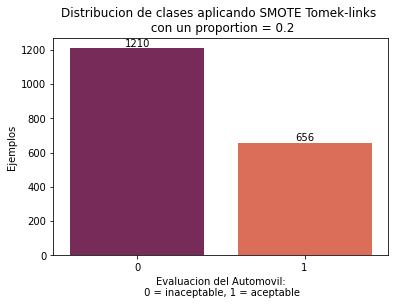

In [29]:
dfSmoteTKLinks = pd.DataFrame(X_tklinks)
dfSmoteTKLinks = dfSmoteTKLinks.assign(col_class = y_tklinks)
dfSmoteTKLinks
ax =  sns.countplot(x='col_class', data=dfSmoteTKLinks, palette='rocket')

abs_values = dfSmoteTKLinks['col_class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil:\n 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases aplicando SMOTE Tomek-links \n con un proportion = 0.2')

<a id='smote-tklinks-matriz_confusion'></a>
## SMOTE-TomeKLinks: Matriz de Confusion
[Inicio ▲](#Indice)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_tklinks, y_tklinks, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[386  23]
 [ 19 188]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       409
           1       0.89      0.91      0.90       207

    accuracy                           0.93       616
   macro avg       0.92      0.93      0.92       616
weighted avg       0.93      0.93      0.93       616



Text(30.5, 0.5, 'true')

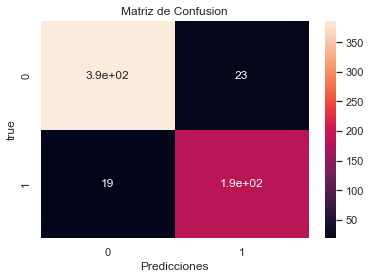

In [31]:
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('Matriz de Confusion') #título
ax.set_xlabel('Predicciones') #eje x
ax.set_ylabel('true') #eje y